In [1]:
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
def load_maps(snapshot_path):
    if "json" in snapshot_path:
        file_mode = "json"
    elif "pkl" in snapshot_path:
        file_mode =  "pkl"
    else:
        print("not found")
        if snapshot_path[-1]=="/":
            snapshot_path += "maps.pkl"
        else:
            snapshot_path += "/maps.pkl"
        file_mode = "pkl"

    if file_mode == "json":
        with open(snapshot_path, "r") as f:
            genomes = json.load(f)
    else:
        with open(snapshot_path, "rb") as f:
            maps = pickle.load(f)
        fitnesses = maps["fitnesses"]
        genomes = maps["genomes"]
        non_zeros = maps["nonzero"]
        genomes=[i.__dict__ for i in genomes.archive]
    return genomes


path = "/home/flowers/work/OpenELM/analysis_P3/quality/to_analyse/maps_1_imgep_smart.json"
genomes = load_maps(path)

In [2]:
non_zeros={}
indices_gen = [i for i, x in enumerate(genomes)]
for i in indices_gen:
    emb = str(genomes[i]["emb"])
    if emb in non_zeros:
        non_zeros[emb].append(i)
    else:
        non_zeros[emb] = [i]

18


In [3]:
n_puzzle=1
list_puzzle_2_eval={}
count=0
for emb,list_idx in non_zeros.items():
    len_list_puz = len(list_idx)
    if len_list_puz>=n_puzzle:
        list_puzzle_2_eval[emb]=np.random.choice(list_idx, min(n_puzzle,6), replace=False)
idx = np.random.choice(len(list_puzzle_2_eval), replace=False)
value = list(list_puzzle_2_eval.values())[idx]
key = list(list_puzzle_2_eval.keys())[idx]
print(idx)
for idx in value:
    print("===========\n\n")
    print(f"number of correct completion {genomes[idx]['n_correct']} / 5 trials")
    print(f"idx {genomes[idx]['idx_generation']}")
    print(genomes[idx]["description"][0])

    print(genomes[idx]["program_str"])


54


number of correct completion 0 / 5 trials
idx 35
The puzzle involves defining a function f that checks if a given subset of numbers is a subset of the Fibonacci sequence up to a certain limit. The solution function g generates the Fibonacci sequence up to the specified limit and returns it. The puzzle requires f(g()) to return True.

def f(subset: list, limit=100) -> bool:
    fibonacci = [0, 1]
    while fibonacci[-1] + fibonacci[-2] <= limit:
        fibonacci.append(fibonacci[-1] + fibonacci[-2])
    return set(subset).issubset(fibonacci)

def g(limit=100):
    fibonacci = [0, 1]
    while fibonacci[-1] + fibonacci[-2] <= limit:
        fibonacci.append(fibonacci[-1] + fibonacci[-2])
    return fibonacci

assert f(g()) == True



In [4]:
```
number of correct completion 2 / 5 trials
idx 84
The puzzle involves defining a function f that checks if a given string is a palindrome after removing non-alphanumeric characters, and a function g that generates a random palindrome string. The assert statement checks if function f returns True when applied to the output of function g.

def f(string: str) -> bool:
    cleaned_string = ''.join(char.lower() for char in string if char.isalnum())
    return cleaned_string == cleaned_string[::-1]

def g():
    import random
    letters = 'abcdefghijklmnopqrstuvwxyz'
    palindrome = ''.join(random.choice(letters) for _ in range(7))
    return palindrome + palindrome[::-1]

assert f(g()) == True
```

SyntaxError: invalid syntax (4163533367.py, line 1)

In [5]:
number of correct completion 0 / 5 trials
idx 35
The puzzle involves defining a function f that checks if a given subset of numbers is a subset of the Fibonacci sequence up to a certain limit. The solution function g generates the Fibonacci sequence up to the specified limit and returns it. The puzzle requires f(g()) to return True.

def f(subset: list, limit=100) -> bool:
    fibonacci = [0, 1]
    while fibonacci[-1] + fibonacci[-2] <= limit:
        fibonacci.append(fibonacci[-1] + fibonacci[-2])
    return set(subset).issubset(fibonacci)

def g(limit=100):
    fibonacci = [0, 1]
    while fibonacci[-1] + fibonacci[-2] <= limit:
        fibonacci.append(fibonacci[-1] + fibonacci[-2])
    return fibonacci

assert f(g()) == True


SyntaxError: invalid syntax (3142497506.py, line 1)

In [48]:
genomes[0].keys()

dict_keys(['fitness', 'program_str', 'emb', 'explanation_emb', 'idx_generation', 'target_skills', 'puzzle_history', 'problem_func', 'solution_func', 'quality', 'description', 'is_valid', 'is_valid_explanation', 'pass_5', 'n_sample', 'n_correct'])

In [ ]:
puz_list=[#n_correct 1 /5
"""
Puzzle description: The puzzle requires the student to define a function that generates a list of numbers based on given parameters, and then check if the generated list satisfies certain conditions.
from typing import List 
def f(x: List[int], a=43536, s=3795, e=417606) -> bool:
    return x[0] == a and x[-1] <= e and (x[-1] + s > e) and all([x[i] + s == x[i + 1] for i in range(len(x) - 1)])
def g(a = 43536, s = 3795, e = 417606):
    return list(range(a, e + 1, s))
assert f(g()) == True
""",
#n_correct 3 /5

"""
The puzzle involves finding a missing number in a list of integers by calculating the sum of the list and comparing it to the expected sum of a sequence of numbers.

from typing import List

def f(missing_num: int, nums=[1, 2, 3, 4, 6, 7, 8, 9]) -> bool:
    n = len(nums) + 1
    total_sum = n * (n + 1) // 2
    return missing_num == total_sum - sum(nums)

def g(nums=[1, 2, 3, 4, 6, 7, 8, 9]) -> int:
    n = len(nums) + 1
    total_sum = n * (n + 1) // 2
    return total_sum - sum(nums)

assert f(g()) == True
""",
#difficulty 3 /5

"""
The puzzle requires the student to create a string expression using only the characters '1', '8', '-', '+', '*', and '/' that evaluates to 63 and contains three occurrences of the digit '8' and one occurrence of the digit '1'.
def f(s: str) -> bool:
    return set(s) <= set('18-+*/') and s.count('8') == 3 and (s.count('1') == 1) and (eval(s) == 63)
def g():
    return "8*8-1**8"
assert f(g()) == True
"""
          
          ]

In [10]:
# ###
# This is a pretraining …. datapoint.
# ###
# Does the previous paragraph demarcated within ### and ###
# contain informative signal for pre-training a large-language model?
# An informative datapoint should be well-formatted, contain some
# usable knowledge of the world, and strictly NOT have any harmful,
# racist, sexist, etc. content.
# OPTIONS:
# - yes
# - no

In [81]:
prompt_fine_finetuning="""###
This is a pretraining datapoint:
```python
from typing import List
from itertools import permutations

def f(nums: List[int]) -> bool:
    def check_condition(perm):
        # Define your condition here
        return True

    for perm in permutations(nums):
        if check_condition(perm):
            return True
    return False

def g():
    return [1, 2, 3]

assert f(g()) == True
```
###
Does the previous paragraph demarcated within ### and ###
contain informative signal for fine-tuning a large-language model?
An informative datapoint should be well-formatted, contain some
usable knowledge of the world.
OPTIONS:
- Yes
- No
"""

prompt_education="""###
This is a educational datapoint to give to students during their exams:
```python
from typing import List
from itertools import permutations

def f(nums: List[int]) -> bool:
    def check_condition(perm):
        # Define your condition here
        return True

    for perm in permutations(nums):
        if check_condition(perm):
            return True
    return False

def g():
    return [1, 2, 3]

assert f(g()) == True
```
###
Does the previous paragraph demarcated within ### and ###
contain informative signal to a large-language model?
An informative datapoint should be well-formatted, contain some
usable knowledge of the world.
OPTIONS:
- Yes
- NO
"""

In [7]:
# top_logprobs
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from openai import OpenAI
from key import OPENAI_API_KEY
from utils_openai import get_completion
cfg: dict = {
"temperature": 0.,
# "top_p": 1.,
# TODO: rename config option?
"model": "gpt-3.5-turbo-0125",
"logprobs": True,
"top_logprobs": 5,
}
max_retries=10
timeout=30
client = OpenAI(api_key=OPENAI_API_KEY,max_retries=max_retries, timeout=timeout)


In [8]:
import tiktoken
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
logits_yes = encoding.encode("yes")
logits_no = encoding.encode("no")

logits_yes, logits_no
logit_bias={str(logits_yes[0]): +100, str(logits_no[0]):+100}

In [9]:
out=get_completion(client,prompt_fine_finetuning, cfg,temperature=0.0)
# out.choices[0].logprobs.content[0].top_logprobs

for tok in out.choices[0].logprobs.content[0].top_logprobs:
    print(tok.token, ", logprobs = " ,np.exp(tok.logprob))

AttributeError: 'str' object has no attribute 'choices'

In [11]:
prompt

'###\nThis is a pretraining datapoint:\n```python\nfrom typing import List\nfrom itertools import permutations\n\ndef f(nums: List[int]) -> bool:\n    def check_condition(perm):\n        # Define your condition here\n        return True\n\n    for perm in permutations(nums):\n        if check_condition(perm):\n            return True\n    return False\n\ndef g():\n    return [1, 2, 3]\n\nassert f(g()) == True\n```\n###\nDoes the previous paragraph demarcated within ### and ###\ncontain informative signal for fine-tuning a large-language model?\nAn informative datapoint should be well-formatted, contain some\nusable knowledge of the world.\nOPTIONS:\n- yes\n- no\n'

In [122]:
# $0.0005 / 1K tokens	$0.0015 / 1K tokens
0.0005*1000, 0.0015*1000

(0.5, 1.5)

In [14]:
for _ in range(5):
    completion = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are an AI programming assistant"},#You are a coding assistant, skilled in writting code with creative flair."},
        {"role": "user", "content": prompt_fine_finetuning}
    ],temperature=None,logprobs=True,top_logprobs=5,model = "gpt-3.5-turbo-0125",max_tokens=1
    )

    for tok in completion.choices[0].logprobs.content[0].top_logprobs:
        print(tok.token, ", logprobs = " ,np.exp(tok.logprob))
    print("=====\n")

yes , logprobs =  0.7980235505503027
no , logprobs =  0.08322585684915011
- , logprobs =  0.08321569559238617
Yes , logprobs =  0.030966168783352257
No , logprobs =  0.0028206991478242705
=====

yes , logprobs =  0.955584274327124
no , logprobs =  0.02049601504053926
- , logprobs =  0.01635460123711706
Yes , logprobs =  0.007025766214712721
No , logprobs =  0.00030244473239863503
=====

yes , logprobs =  0.7980235505503027
no , logprobs =  0.08322585684915011
- , logprobs =  0.08321569559238617
Yes , logprobs =  0.030966168783352257
No , logprobs =  0.0028206991478242705
=====

yes , logprobs =  0.8623405126885293
- , logprobs =  0.045371972971242534
no , logprobs =  0.044624943722659634
Yes , logprobs =  0.044412069984045864
No , logprobs =  0.0026025670346923966
=====

yes , logprobs =  0.8623405126885293
- , logprobs =  0.045371972971242534
no , logprobs =  0.044624943722659634
Yes , logprobs =  0.044412069984045864
No , logprobs =  0.0026025670346923966
=====



In [119]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
path_model= "/home/flowers/work/hf/deepseek-coder-1.3b-instruct"
tokenizer = AutoTokenizer.from_pretrained(path_model,local_files_only=True)#LlamaTokenizer.from_pretrained(model_id,local_files_only=True)
dtype = torch.bfloat16
model = AutoModelForCausalLM.from_pretrained(
    path_model,

    device_map="auto",
    local_files_only=True,
)
model.eval()
model.config.use_cache = True
soft=torch.nn.Softmax(dim=1)

prompt_model="""You are an AI programming assistant, utilizing the DeepSeek Coder model, developed by DeepSeek Company, and you only answer questions related to computer science.
### Instruction:
{instruction}
### Response:
"""


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [120]:
full_prompt = prompt_model.format(instruction = prompt_education)# prompt_fine_finetuning)
yes_prompt= full_prompt# + "Yes"
# no_prompt= full_prompt + "No"
# print(full_prompt)

In [123]:
with torch.inference_mode():
    input_tokenise=tokenizer(yes_prompt, return_tensors='pt').to("cuda")
    out_yes=model(**input_tokenise)


233

In [113]:
# return p(yes|prompt)
k=5
yes_logits=soft(out_yes.logits[:,-1]).cpu().detach() #logits associated with the token "yes"
values,indices=torch.topk(yes_logits, k)
list_token=tokenizer.batch_decode(indices.T)
values,list_token
if "Yes" in list_token:
    idx = list_token.index("Yes")
elif "yes" in list_token:
    idx = list_token.index("yes")
elif "No" in list_token:
    idx = list_token.index("No")
elif "no" in list_token:
    idx = list_token.index("no")
# else:
    # return 0.5
values[[0],idx].item()

0.5670896768569946

In [111]:
idx

0

In [96]:
# tokenizer.decode(torch.argmax(yes_logits, dim=1)),yes_logits[0,torch.argmax(yes_logits, dim=1)]

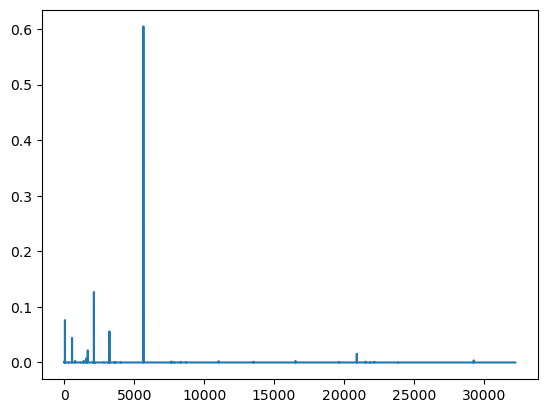

In [97]:
plt.plot(yes_logits[0])


# logits bias

In [21]:
completion = client.chat.completions.create(
messages=[
    {"role": "system", "content": "You are an AI programming assistant"},#You are a coding assistant, skilled in writting code with creative flair."},
    {"role": "user", "content": prompt}
],temperature=0.0,logprobs=True,top_logprobs=5,model = "gpt-3.5-turbo-0125",max_tokens=1,logit_bias=logit_bias,
)

for tok in completion.choices[0].logprobs.content[0].top_logprobs:
    print(tok.token, ", logprobs = " ,np.exp(tok.logprob))


yes , logprobs =  0.825312662166235
no , logprobs =  0.17468727563723466
Yes , logprobs =  3.720075976020836e-44
- , logprobs =  3.720075976020836e-44
No , logprobs =  3.720075976020836e-44
